In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gensim import corpora, models, similarities
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
import nltk
import pickle
import gensim
from itertools import chain

In [2]:
business = pd.read_csv('chinese_business_clean.csv')
reviews = pd.read_csv('chinese_reviews_clean.csv')

In [7]:
reviews_ch = reviews.sort_values(by = 'date')

In [19]:
from datetime import datetime
date = [datetime.strptime(d, '%Y-%m-%d') for d in reviews_ch['date']]

In [47]:
prev_m = date[0].month
prev_y = date[0].year
counter = 0
flag = []
for d in date:
    month = d.month 
    year = d.year 
    if year > prev_y or month > prev_m:
        flag.append(counter)
        counter = 1
    else:
        counter += 1
    prev_m = month    
    prev_y = year

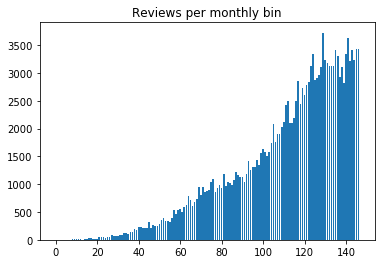

In [48]:
plt.bar(np.arange(len(flag)), flag)
plt.title('Reviews per monthly bin')
plt.show()

In [45]:
prev_y = date[0].year
counter = 0
flag = []
for d in date:
    month = d.month 
    year = d.year 
    if year > prev_y:
        flag.append(counter)
        counter = 1
    else:
        counter += 1
    prev_m = month    
    prev_y = year

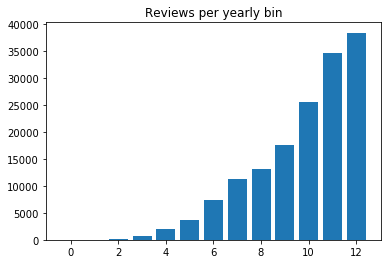

In [46]:
plt.bar(np.arange(len(flag)), flag)
plt.title('Reviews per yearly bin')
plt.show()

In [51]:
prev_m = date[0].month
prev_y = date[0].year
counter = 0
flag = []
for d in date:
    month = d.month 
    year = d.year 
    if year > prev_y or month > prev_m:
        flag.append(counter)
        if counter < 100:
            print (d)
        counter = 1
    else:
        counter += 1
    prev_m = month    
    prev_y = year

2005-02-02 00:00:00
2005-04-08 00:00:00
2005-05-12 00:00:00
2005-06-17 00:00:00
2005-07-18 00:00:00
2005-10-12 00:00:00
2005-11-02 00:00:00
2005-12-02 00:00:00
2006-01-01 00:00:00
2006-02-06 00:00:00
2006-03-01 00:00:00
2006-04-02 00:00:00
2006-05-07 00:00:00
2006-06-01 00:00:00
2006-07-08 00:00:00
2006-08-06 00:00:00
2006-09-01 00:00:00
2006-10-01 00:00:00
2006-11-05 00:00:00
2006-12-09 00:00:00
2007-01-02 00:00:00
2007-02-02 00:00:00
2007-03-01 00:00:00
2007-04-02 00:00:00
2007-05-01 00:00:00
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-02 00:00:00


## Start collecting data from 2008/1

In [103]:
data = reviews[reviews['date'] > '2008-01-02']

In [54]:
lda =  models.LdaModel.load('gensim/lda.model')
dictionary = corpora.Dictionary.load('gensim/chinsese_dict.dict')

In [3]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

def embed(text, model, dictionary):
    text = tokenize(text)
    bow = dictionary.doc2bow(text)
    kindex = model.get_document_topics(bow, minimum_probability = 0.0)
    out = [0] * model.num_topics
    for i, p in kindex:
        out[i] = p
    return np.array(out) 

def embed_sent(text, model, dictionary):
    out = np.array([0.]*128)
    sentences = len(nltk.sent_tokenize(text))
    for text in nltk.sent_tokenize(text):
        out += embed(text, lda, dictionary)
    return (out/sentences)

In [4]:
embed_sent(reviews['text'][3], lda, dictionary)

NameError: name 'reviews' is not defined

In [67]:
def embed_sent_freq(text, model, dictionary):
    out = np.array([0.]*128)
    sentences = len(nltk.sent_tokenize(text))
    for text in nltk.sent_tokenize(text):
        out += np.ceil(embed(text, lda, dictionary))
    return out

In [71]:
embed_sent_freq(reviews['text'][3], lda, dictionary)

array([ 0.,  0.,  2.,  0.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [70]:
np.argsort(embed_sent_freq(reviews['text'][3], lda, dictionary))[::-1]

array([ 53,   4,  85,   2, 127, 103, 105,  18,  13, 109,  64,   6,  54,
        35,  36,  37,  58,  38,  39,  40,  41,  42,  43,  44,  45,  55,
        57,  46,  47,  33,  48,  49,  50,  56,  51,  52,  34,  29,  32,
        31,   1,   3,   5,   7,   8,   9,  10,  11,  12,  14,  15,  16,
        17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  60,  30,
        59,  63,  61,  94,  96,  97,  98,  99, 100, 101, 102, 104, 106,
       107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125,  95,  93,  62,  92, 126,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  86,  87,  88,  89,  90,  91,   0])

## Run tf-idf over Topic appereance

In [100]:
def Topic_tokenize(embed):
    top_topics = np.argsort(embed)[::-1]
    i = 0 
    prev = embed[top_topics[i]]
    tokenize = []
    while prev > 0.0:
        tokenize += ['topic' + str(top_topics[i])] * int(prev)
        i += 1
        prev = embed[top_topics[i]]
    return np.array(tokenize)

In [101]:
embeded = embed_sent_freq(reviews['text'][3], lda, dictionary)

In [106]:
%time Topic_tokenize(embeded)

CPU times: user 106 µs, sys: 12 µs, total: 118 µs
Wall time: 112 µs


array(['topic53', 'topic53', 'topic53', 'topic53', 'topic4', 'topic4',
       'topic4', 'topic2', 'topic2', 'topic13', 'topic13', 'topic127',
       'topic85', 'topic105', 'topic18', 'topic109', 'topic103', 'topic64',
       'topic6', 'topic5', 'topic62'], 
      dtype='<U8')

In [107]:
def gen_topic_token(text):
    emb = embed_sent_freq(text, lda, dictionary)
    return Topic_tokenize(emb)

In [108]:
data = data.sort_values(by = 'date')

In [117]:
%time topics = [gen_topic_token(t) for t in data['text']]

CPU times: user 38min 19s, sys: 5.28 s, total: 38min 25s
Wall time: 34min 45s


In [121]:
# save file
with open("gensim/topic_tokenized.pkl", "wb") as f:
    pickle.dump(np.array(topics), f)

In [123]:
# make sure it saved
with open("gensim/topic_tokenized.pkl", "rb") as f:
    l = pickle.load(f)

In [128]:
dictionary = gensim.corpora.Dictionary(topics)

In [129]:
print (dictionary)

Dictionary(128 unique tokens: ['topic53', 'topic95', 'topic103', 'topic23', 'topic97']...)


In [130]:
dictionary.save('gensim/topic_name_dict.dict')

In [131]:
dictionary.doc2bow(topics[0])

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [133]:
corpus = [dictionary.doc2bow(text) for text in topics]

In [134]:
corpora.MmCorpus.serialize('gensim/topic_name_count.mm', corpus)

In [135]:
tfidf = models.TfidfModel(corpus)

In [156]:
prev_m = date[0].month
prev_y = date[0].year
counter = 0
flag_n = 0
flag = []
csv = []
for i, d in enumerate(date):
    month = d.month 
    year = d.year 
    if year > prev_y or month > prev_m:
        flag.append(counter)
        counter = 1
        flag_n += 1
    else:
        counter += 1
    csv.append({"review_id" :reviews_ch['review_id'].values[i], "flag": flag_n})
    prev_m = month    
    prev_y = year

In [160]:
pd.DataFrame(csv).to_csv('time_flag.csv', index = False)

In [170]:
t_flag = pd.DataFrame(csv)

In [171]:
flag_count = t_flag.groupby('flag').count().reset_index()

In [178]:
flag_count[flag_count['review_id'] > 100].tail()

,flag,review_id
143,143,3412
144,144,3240
145,145,3429
146,146,3422
147,147,3194


In [183]:
old_review = reviews[reviews['review_id'].isin(set(t_flag[t_flag['flag'] == 33]['review_id']))]
new_review = reviews[reviews['review_id'].isin(set(t_flag[t_flag['flag'] == 147]['review_id']))]

In [189]:
topic_map = {}
for i, t in zip(data['review_id'], topics):
    topic_map[i] = t

In [284]:
d = []
for i in set(t_flag[t_flag['flag'] == 99]['review_id']):
    if i in topic_map.keys():
        d.append(topic_map[i])
d = dictionary.doc2bow(list(chain(*d)))
old = [j for i,j in sorted(tfidf[d])]

In [285]:
d = []
for i in set(t_flag[t_flag['flag'] == 123]['review_id']):
    if i in topic_map.keys():
        d.append(topic_map[i])
d = dictionary.doc2bow(list(chain(*d)))
mid = [j for i,j in sorted(tfidf[d])]

In [286]:
d = []
for i in set(t_flag[t_flag['flag'] == 147]['review_id']):
    if i in topic_map.keys():
        d.append(topic_map[i])
d = dictionary.doc2bow(list(chain(*d)))
new = [j for i,j in sorted(tfidf[d])]

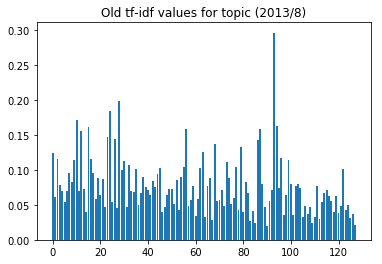

In [287]:
plt.bar(np.arange(len(old)), old)
plt.title('Old tf-idf values for topic (2013/8)')
plt.show()

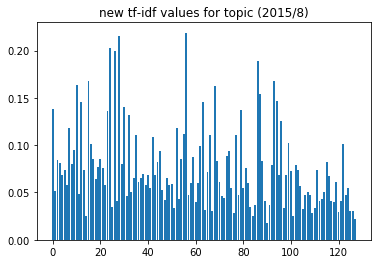

In [291]:
plt.bar(np.arange(len(mid)), mid)
plt.title('new tf-idf values for topic (2015/8)')
plt.show()

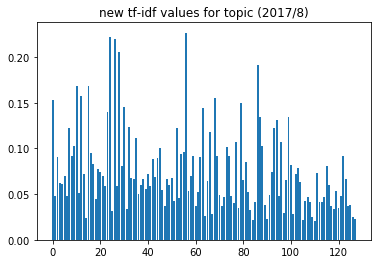

In [290]:
plt.bar(np.arange(len(new)), new)
plt.title('new tf-idf values for topic (2017/8)')
plt.show()

There is a clear difference in topic distributon over time